In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Load results

In [2]:
def read_results(results_path):
    results_path = Path(results_path)

    return pd.concat({
        (repeat, path.stem): pd.read_csv(path, index_col=0) 
        for repeat in range(10)
        for path in results_path.glob(f'repeat_{repeat}/*.csv')
    }, names=['Repeat', 'Label', 'entry_name']).reset_index(level=0).groupby(['Repeat', 'Label']).mean().reset_index()


In [3]:
results = pd.concat({
    'Deep Embeddings': read_results('results_deep_embeddings/'),
    '3-mers': read_results('results_3mers_embeddings/'),
    '3-mers TF-IDF': read_results('results_3mers-tfidf_embeddings/'),
    'AA freq.': read_results('results_aafreq_embeddings/'),
}, names=['Representation']).reset_index()
results

,Representation,level_1,Repeat,Label,k=3,k=15,k=51
0,Deep Embeddings,0,0,EC number,0.914840,0.880780,0.829055
1,Deep Embeddings,1,0,Family,0.448572,0.320769,0.193732
2,Deep Embeddings,2,0,GO,0.894439,0.870609,0.824576
3,Deep Embeddings,3,0,Gene3D,0.949130,0.928701,0.890212
4,Deep Embeddings,4,0,Genus,0.302452,0.218895,0.144004
...,...,...,...,...,...,...,...
475,AA freq.,115,9,Order,0.503421,0.446217,0.366900
476,AA freq.,116,9,Pfam,0.613176,0.572098,0.496425
477,AA freq.,117,9,Phylum,0.763526,0.733428,0.687157
478,AA freq.,118,9,SUPFAM,0.652990,0.608336,0.520726


In [4]:
classificators = results.filter(like='k=').columns.tolist()
classificators

['k=3', 'k=15', 'k=51']

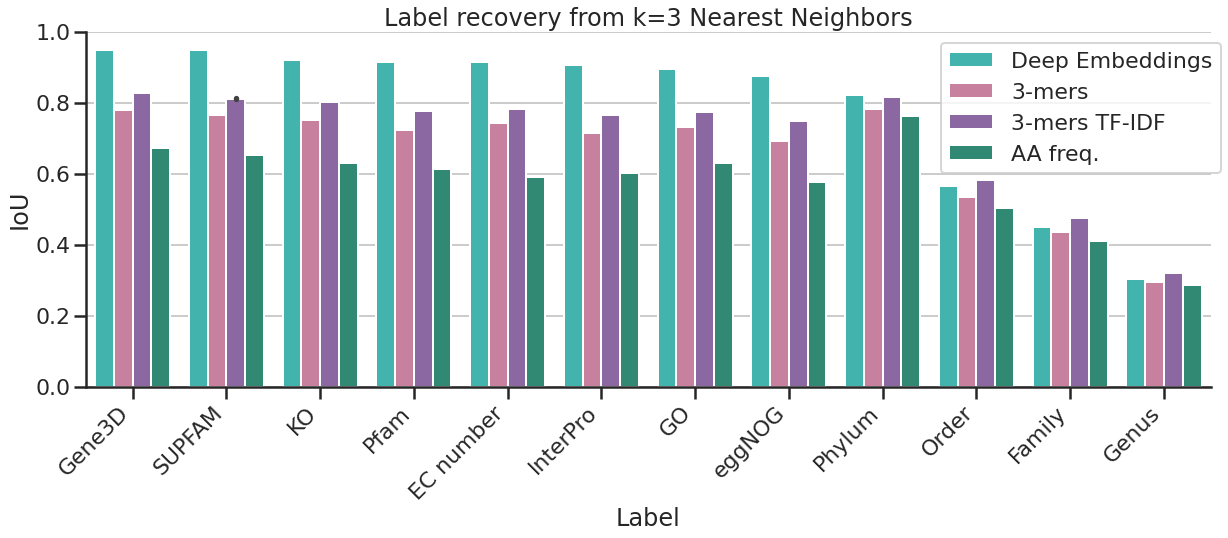

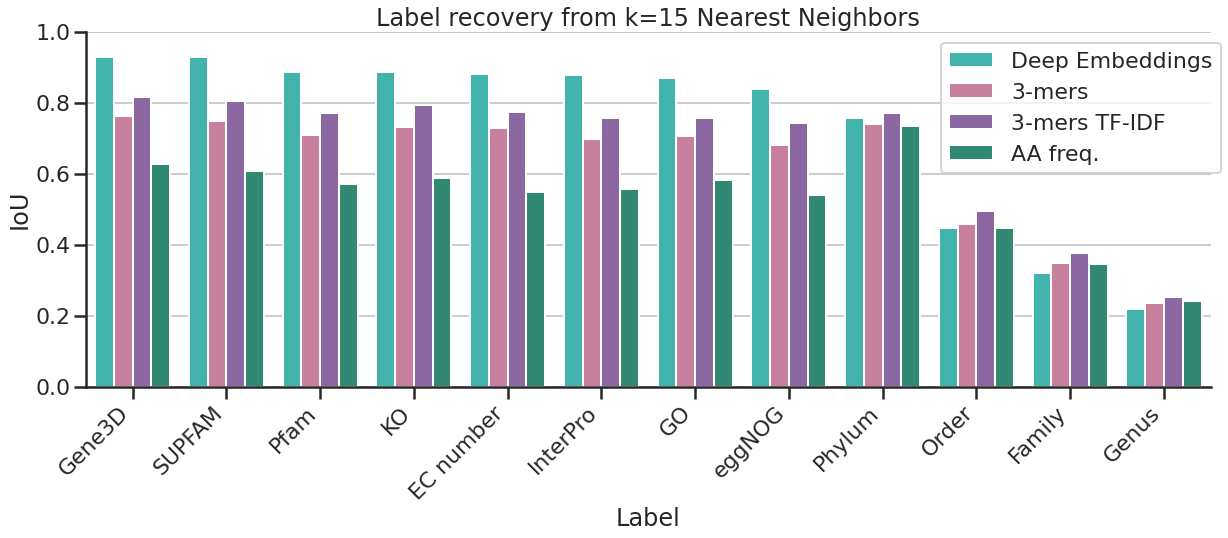

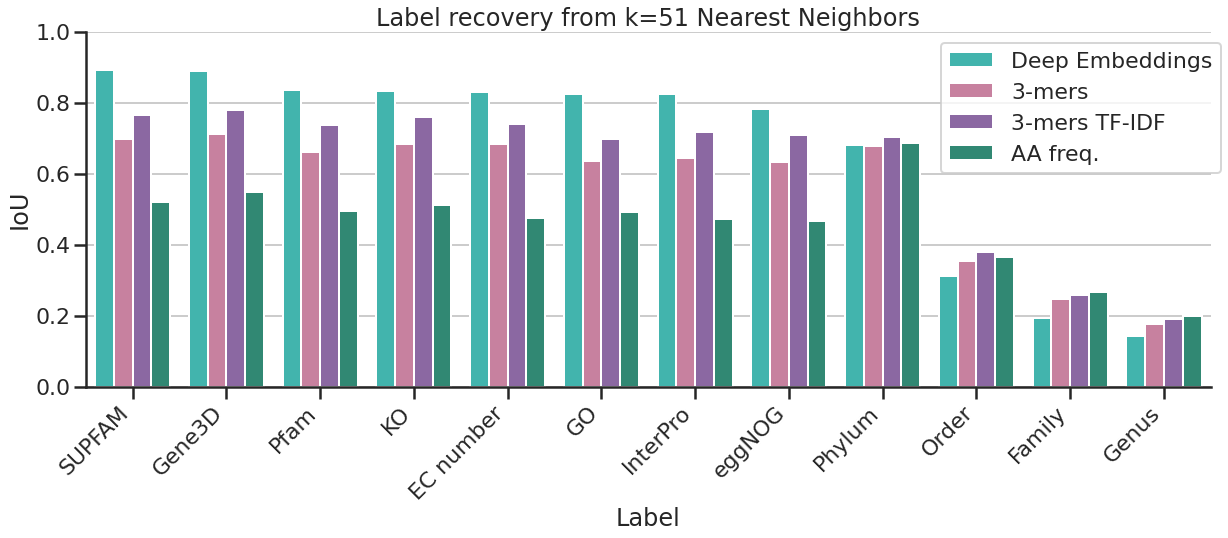

In [6]:
sns.set(context='poster', style='white')

for classificator in classificators:

    order = (
        results.query('Representation == "Deep Embeddings"')
            .groupby('Label')
            .mean()
            .sort_values(classificator, ascending=False).index
    )

    plt.figure(figsize=(18, 8))
    sns.barplot(
        data=results,
        x='Label',
        y=classificator,
        hue='Representation',
        order=order,
        ci=10,
        palette=["#2fc7bd", "#d3759e", "#8d5eac", "#22967b"],
    )
    
    plt.ylim(0,1)
    plt.ylabel('IoU')
    plt.xticks(rotation=45, ha='right')
    plt.gca().yaxis.tick_left()
    plt.gca().xaxis.tick_bottom()
    
    sns.despine()
    plt.title(f'Label recovery from {classificator} Nearest Neighbors')
    plt.legend(bbox_to_anchor=(0.75, 1.0))
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()